In [1]:
from tensorflow.keras.models import Sequential

C:\Users\WADUD ALI\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation,Flatten,Dense

In [3]:
model = Sequential()

In [4]:
model.add(Conv2D(64,kernel_size=(3,3),input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3)))


In [5]:
model.add(Conv2D(64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3)))

In [6]:
model.add(Conv2D(128,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3)))

In [7]:
model.add(Flatten())

In [8]:
from tensorflow.keras.layers import Dropout

In [9]:
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))

In [10]:
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))

In [11]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
optimizer=RMSprop(),
loss='binary_crossentropy',
metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
rescale = 1/255,
    rotation_range=15,
    zoom_range=0.1,
)

In [15]:
validation_datagen = ImageDataGenerator(
rescale = 1/255
)

In [16]:
BATCH_SIZE = 16
train_generator = train_datagen.flow_from_directory(
'horse-or-human/bt/',
    target_size=(256,256),
    batch_size=BATCH_SIZE,
    class_mode = 'binary'
)
validation_generator = validation_datagen.flow_from_directory(
'horse-or-human/bv/',
#validation
    batch_size=BATCH_SIZE,
    class_mode = 'binary'

)

Found 2003 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [17]:
history = model.fit(
train_generator,
    steps_per_epoch=1027//BATCH_SIZE,
    epochs=4,
    validation_data = validation_generator,
    validation_steps = 256//BATCH_SIZE

)

Epoch 1/4
64/64 [==============================] - 67s 996ms/step - loss: 0.6970 - accuracy: 0.5459 - val_loss: 0.6805 - val_accuracy: 0.5000
Epoch 2/4
64/64 [==============================] - 62s 968ms/step - loss: 0.2329 - accuracy: 0.9070
Epoch 3/4
64/64 [==============================] - 59s 904ms/step - loss: 0.0407 - accuracy: 0.9921
Epoch 4/4
64/64 [==============================] - 73s 1s/step - loss: 0.0126 - accuracy: 0.9951


In [ ]:
# history.history
# import matplotlib.pyplot as plt
# plt.plot(range(4), history.history['accuracy'])
# plt.plot(range(4), history.history['val_accuracy'])





In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
img = load_img('not.jpeg')
img

In [ ]:
x =  img_to_array(img.resize([256,256]))
x = x.reshape((1,) + x.shape)


In [ ]:
# if (model.predict(x) == 0):
#     print ('Bottle')
# else:
#     print ('Not bottle')


# Test with webcam

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [19]:
import cv2

# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 represents the default camera, change it if you have multiple cameras

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Unable to access the camera")
    exit()

# Capture a frame
ret, frame = cap.read()

# Check if the frame was captured successfully
if not ret:
    print("Error: Unable to capture frame")
    cap.release()  # Release the camera
    exit()

# Save the captured image
cv2.imwrite("captured_image.jpg", frame)

# Release the camera
cap.release()


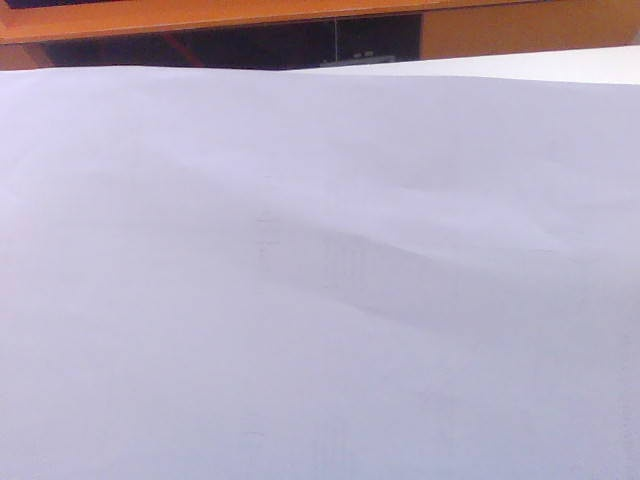

In [20]:
img = load_img('captured_image.jpg')
img

In [21]:
x =  img_to_array(img.resize([256,256]))
x = x.reshape((1,) + x.shape)


In [22]:
if (model.predict(x) == 0):
    print ('Bottle')
else:
    print ('Not bottle')

1/1 [==============================] - 0s 205ms/step
Bottle


In [5]:
import numpy
print(numpy.__version__)

1.24.4


In [8]:
import tensorflow

AttributeError: module 'numpy' has no attribute 'typeDict'